# Regular Expressions

## Exercises

In [28]:
import re

### 1. 
Write a function named is_vowel. It should accept a string as input and use a regular expression to determine if the passed string is a vowel. While not explicity mentioned in the lesson, you can treat the result of re.search as a boolean value that indicates whether or not the regular expression matches the given string.

In [29]:
def is_vowel(string):
    '''
    This function accepts a string as input and uses a regular expression to determine if the passed string is a vowel.
    '''
    regexp = r'[aeiouAEIOU]'
    return bool(re.search(regexp, string))

In [30]:
is_vowel('a')

True

In [31]:
is_vowel('b')

False

### 2. 
Write a function named is_valid_username that accepts a string as input. A valid username starts with a lowercase letter, and only consists of lowercase letters, numbers, or the _ character. It should also be no longer than 32 characters. The function should return either True or False depending on whether the passed string is a valid username.

```python
>>> is_valid_username('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
False
>>> is_valid_username('codeup')
True
>>> is_valid_username('Codeup')
False
>>> is_valid_username('codeup123')
True
>>> is_valid_username('1codeup')
False
```


In [32]:
def is_valid_username(string):
    '''
    This function accepts a string as input and uses a regular expression to determine if the passed string is a valid username.
    '''
    regexp = r'^[a-z][a-z0-9_]{,31}$'
    return bool(re.search(regexp, string))

In [33]:
print(is_valid_username('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'))

print(is_valid_username('codeup'))

print(is_valid_username('Codeup'))

print(is_valid_username('codeup123'))

print(is_valid_username('1codeup'))

False
True
False
True
False


### 3. 
Write a regular expression to capture phone numbers. It should match all of the following:

```
(210) 867 5309
+1 210.867.5309
867-5309
210-867-5309
```


In [34]:
def is_valid_phone_number(string):
    '''
    This function accepts a string as input and uses a regular expression to determine if the passed string is a valid phone number.
    '''
    regexp = r'^\+?1?\s?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}$|^(\d{3}[\s.-]?)?\d{3}[\s.-]?\d{4}$'
    return bool(re.search(regexp, string))

- `^` matches the start of the string
- `\+?` matches an optional plus sign
- `1?` matches an optional 1
- `\s?` matches an optional whitespace character
- `\(?\d{3}\)?` matches an optional opening parenthesis, followed by three digits, followed by an optional closing parenthesis
- `[\s.-]?` matches an optional whitespace character, period, or hyphen
- `\d{3}` matches three digits
- `[\s.-]?` matches an optional whitespace character, period, or hyphen
- `\d{4}` matches four digits
- `$` matches the end of the string
- `|` is the OR operator
- `(\d{3}[\s.-]?)?` matches an optional three-digit area code followed by a whitespace character, period, or hyphen
- `\d{3}` matches three digits
- `[\s.-]?` matches an optional whitespace character, period, or hyphen
- `\d{4}` matches four digits
- `$` matches the end of the string

In [35]:
print(is_valid_phone_number('(210) 867 5309'))

print(is_valid_phone_number('+1 210.867.5309'))

print(is_valid_phone_number('867-5309'))

print(is_valid_phone_number('210-867-5309'))

True
True
True
True



### 4. 
Use regular expressions to convert the dates below to the standardized year-month-day format.

```
02/04/19
02/05/19
02/06/19
02/07/19
02/08/19
02/09/19
02/10/19
```


In [36]:
def convert_date(string):
    '''
    This function accepts a string as input and uses a regular expression to convert the dates below to the standardized year-month-day format.
    '''
    regexp = r'(\d+)/(\d+)/(\d+)'
    return re.sub(regexp, r'20\3-\1-\2', string)

In [37]:
print(convert_date('02/04/19'))
print(convert_date('02/05/19'))
print(convert_date('02/06/19'))
print(convert_date('02/07/19'))
print(convert_date('02/08/19'))
print(convert_date('02/09/19'))
print(convert_date('02/10/19'))

2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-10



### 5. 
Write a regex to extract the various parts of these logfile lines:

```
GET /api/v1/sales?page=86 [16/Apr/2019:193452+0000] HTTP/1.1 {200} 510348 "python-requests/2.21.0" 97.105.19.58
POST /users_accounts/file-upload [16/Apr/2019:193452+0000] HTTP/1.1 {201} 42 "User-Agent: Mozilla/5.0 (X11; Fedora; Fedora; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36" 97.105.19.58
GET /api/v1/items?page=3 [16/Apr/2019:193453+0000] HTTP/1.1 {429} 3561 "python-requests/2.21.0" 97.105.19.58
```


In [74]:
import re

def extract_logfile(string):
    '''
    This function accepts a string as input and uses a regular expression to extract the various parts of the logfile lines.
    '''
    regexp = r'''
    (?P<method>GET|POST)
    \s
    (?P<path>.*?)
    \s
    \[(?P<timestamp>.*?)\]
    \s
    (?P<protocol>.*?)
    \s
    \{(?P<status>.*?)\}
    \s
    (?P<bytes_sent>.*?)
    \s
    \"(?P<user_agent>.*?)\"
    \s
    (?P<ip>.*?)
    '''
    lines = string.split('\n')
    results = []
    for line in lines:
        if line.strip():
            results.append(re.search(regexp, line, re.VERBOSE).groupdict())
    return results

- `(?P<method>GET|POST)` matches the HTTP method (GET or POST) and captures it in a named group called "method"

- `\s` matches a whitespace character

- `(?P<path>.*?)` matches the path of the requested resource and captures it in a named group called "path". The `.*?` matches any character (except for a newline) zero or more times, but as few times as possible.

- `\s` matches a whitespace character

- `\[(?P<timestamp>.*?)\]` matches the timestamp of the request and captures it in a named group called "timestamp". The timestamp is enclosed in square brackets, and the `.*?` matches any character (except for a newline) zero or more times, but as few times as possible.

- `\s` matches a whitespace character

- `(?P<protocol>.*?)` matches the protocol used in the request and captures it in a named group called "protocol". The `.*?` matches any character (except for a newline) zero or more times, but as few times as possible.

- `\s` matches a whitespace character

- `\{(?P<status>.*?)\}` matches the HTTP status code and captures it in a named group called "status". The status code is enclosed in curly braces, and the `.*?` matches any character (except for a newline) zero or more times, but as few times as possible.

- `\s` matches a whitespace character

- `(?P<bytes_sent>.*?)` matches the number of bytes sent in the response and captures it in a named group called "bytes_sent". The `.*?` matches any character (except for a newline) zero or more times, but as few times as possible.

- `\s` matches a whitespace character

- `\"(?P<user_agent>.*?)\"` matches the user agent string and captures it in a named group called "user_agent". The user agent string is enclosed in double quotes, and the `.*?` matches any character (except for a newline) zero or more times, but as few times as possible.

- `\s` matches a whitespace character

- `(?P<ip>.*?)` matches the IP address of the client and captures it in a named group called "ip". The `.*?` matches any character (except for a newline) zero or more times, but as few times as possible.

In [77]:
import pprint as p

log = (
"""GET /api/v1/sales?page=86 [16/Apr/2019:193452+0000] HTTP/1.1 {200} 510348 "python-requests/2.21.0" 97.105.19.58
POST /users_accounts/file-upload [16/Apr/2019:193452+0000] HTTP/1.1 {201} 42 "User-Agent: Mozilla/5.0 (X11; Fedora; Fedora; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36" 97.105.19.58
GET /api/v1/items?page=3 [16/Apr/2019:193453+0000] HTTP/1.1 {429} 3561 "python-requests/2.21.0" 97.105.19.58"""
)

extract_logfile(log)

lines = log.split('\r\n')
for line in lines:
    p.pprint(extract_logfile(line))

[{'bytes_sent': '510348',
  'ip': '',
  'method': 'GET',
  'path': '/api/v1/sales?page=86',
  'protocol': 'HTTP/1.1',
  'status': '200',
  'timestamp': '16/Apr/2019:193452+0000',
  'user_agent': 'python-requests/2.21.0'},
 {'bytes_sent': '42',
  'ip': '',
  'method': 'POST',
  'path': '/users_accounts/file-upload',
  'protocol': 'HTTP/1.1',
  'status': '201',
  'timestamp': '16/Apr/2019:193452+0000',
  'user_agent': 'User-Agent: Mozilla/5.0 (X11; Fedora; Fedora; Linux x86_64) '
                'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 '
                'Safari/537.36'},
 {'bytes_sent': '3561',
  'ip': '',
  'method': 'GET',
  'path': '/api/v1/items?page=3',
  'protocol': 'HTTP/1.1',
  'status': '429',
  'timestamp': '16/Apr/2019:193453+0000',
  'user_agent': 'python-requests/2.21.0'}]



### Bonus
You can find a list of words on your mac at /usr/share/dict/words. Use this file to answer the following questions:

- How many words have at least 3 vowels?
- How many words have at least 3 vowels in a row?
- How many words have at least 4 consonants in a row?
- How many words start and end with the same letter?
- How many words start and end with a vowel?
- How many words contain the same letter 3 times in a row?
- What other interesting patterns in words can you find?

## Notes During Lesson Below this Point

General NLP pipeline

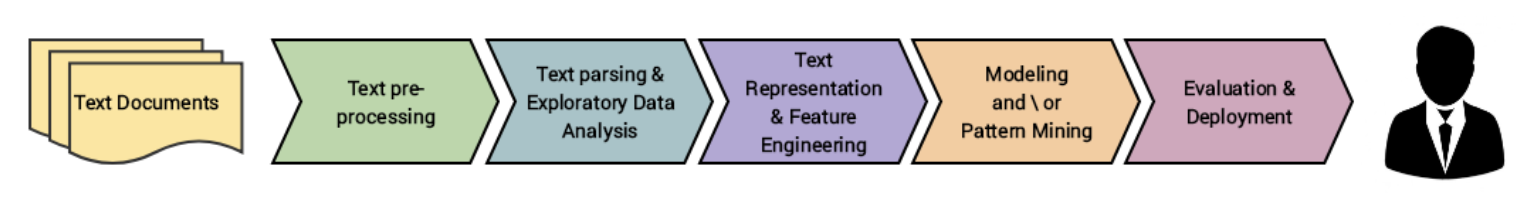

1. Processing & Understanding Text

2. Feature Engineering & Text Representation

3. Supervised Learning Models for Text Data

4. Unsupervised Learning Models for Text Data

5. Advanced Topics

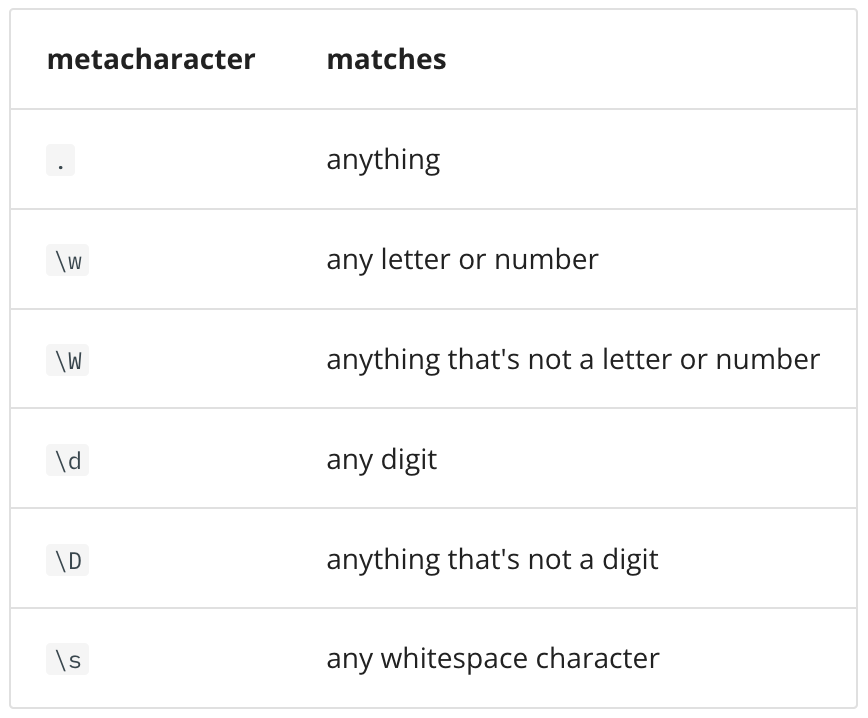

Stemming and lemmatization are two popular techniques used in Natural Language Processing (NLP) to preprocess text data. Both techniques aim to reduce inflectional and derivational forms of words to their base or root form, but they differ in their approach.

**<u>Stemming is a process of reducing a word to its base or root form by removing the suffixes.</u>**

It is a rule-based approach that chops off the end of the word using heuristics, without any knowledge of the context in which the word is used. For example, the stem of the word "running" is "run", and the stem of the word "jumps" is "jump". Stemming is a faster and simpler technique compared to lemmatization, but it may not always produce a valid word.

**<u>Lemmatization, on the other hand, is a process of reducing a word to its base or root form by taking into account the context in which the word is used.</u>**

It uses a vocabulary and morphological analysis to obtain the base form of a word, which is called a lemma. For example, the lemma of the word "running" is "run", and the lemma of the word "jumps" is "jump". Lemmatization is a more accurate technique compared to stemming, but it is slower and more complex.

Some examples to illustrate the difference between stemming and lemmatization:

|Word|Stem|Lemma|
|-|-|-|
|running|run|run|
|jumps|jump|jump|
|cats|cat|cat|
|troublesome|troubl|troublesome|
|swimming|swim|swim|
|dogs|dog|dog|
|playing|play|play|
|boxes|box|box|
|knives|knive|knife|
|geese|gees|goose|
|wolves|wolv|wolf|
|leaves|leav|leaf|
|children|children|child|
|sheep|sheep|sheep|
|deer|deer|deer|
|fish|fish|fish|
|men|men|man|
|women|women|woman|
|feet|feet|foot|
|teeth|teeth|tooth|
|people|peopl|people|
|oxen|oxen|ox|
|cacti|cacti|cactus|
|fungi|fungi|fungus|
|criteria|criteria|criterion|
|phenomena|phenomena|phenomenon|

As you can see, stemming produces stems that may not be valid words, while lemmatization produces valid lemmas that are actual words. However, lemmatization is a more complex process that requires more computational resources compared to stemming.

This regular expression is designed to match a log line from an Apache web server access log. Here is a breakdown of the different parts of the regular expression:

`(?P<ip>.*?)` - This is a named capture group that matches the IP address of the client making the request. The `.*?` matches any character (except for a newline) zero or more times, as few times as possible.

`\s` - This matches a whitespace character.

`.*?\[` - This matches any character (except for a newline) zero or more times, as few times as possible, followed by an opening square bracket.

`(?P<timestamp>.*?)` - This is another named capture group that matches the timestamp of the request. The `.*?` matches any character (except for a newline) zero or more times, as few times as possible.

`\]` - This matches a closing square bracket.

`\s+"` - This matches a whitespace character followed by a double quote.

`(?P<method>[A-Z]+)` - This is a named capture group that matches the HTTP method used in the request. The `[A-Z]+` matches one or more uppercase letters.

`\s` - This matches a whitespace character.

`(?P<path>.*?)` - This is a named capture group that matches the path of the requested resource. The `.*?` matches any character (except for a newline) zero or more times, as few times as possible.

`\sHTTP/1.1"\s` - This matches a whitespace character, followed by the string "HTTP/1.1", followed by a double quote and another whitespace character.

`(?P<status>\d+)` - This is a named capture group that matches the HTTP status code returned by the server. The `\d+` matches one or more digits.

`\s` - This matches a whitespace character.

`(?P<bytes_sent>\d+)` - This is a named capture group that matches the number of bytes sent in the response. The `\d+` matches one or more digits.

`\s"(?P<referrer>.*?)"\s` - This matches a whitespace character, followed by a double quote, followed by the referrer URL (if any), followed by another double quote and a whitespace character.

`"(?P<user_agent>.*?)"` - This is a named capture group that matches the user agent string sent by the client. The `.*?` matches any character (except for a newline) zero or more times, as few times as possible, surrounded by double quotes.

Overall, this regular expression captures the IP address, timestamp, HTTP method, path, status code, bytes sent, referrer URL, and user agent string from a log line in an Apache web server access log.

Regex

- What is a regular expression?
- When are regular expressions useful?


In [40]:
# %%
import pandas as pd
import re # part of the python stdlib

In [41]:

log_file_lines = '''
76.185.131.226 - - [11/May/2020:14:25:53 +0000] "GET / HTTP/1.1" 200 42 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:25:46 +0000] "GET / HTTP/1.1" 200 42 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:25:58 +0000] "GET / HTTP/1.1" 200 42 "-" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36"
76.185.131.226 - - [11/May/2020:16:25:58 +0000] "GET /favicon.ico HTTP/1.1" 200 162 "https://python.zach.lol/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36"
104.5.217.57 - - [11/May/2020:16:26:27 +0000] "GET / HTTP/1.1" 200 42 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:26:46 +0000] "GET /documentation HTTP/1.1" 200 348 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:26:54 +0000] "GET /documentation HTTP/1.1" 200 348 "-" "python-requests/2.23.0"
104.5.217.57 - - [11/May/2020:16:27:04 +0000] "GET /documentation HTTP/1.1" 200 348 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:27:05 +0000] "GET /documentation HTTP/1.1" 200 348 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:27:10 +0000] "GET /documentation HTTP/1.1" 200 348 "-" "python-requests/2.23.0"
'''


In [42]:

regex = r'(?P<ip>.*?)\s.*?\[(?P<timestamp>.*?)\]\s+"(?P<method>[A-Z]+)\s(?P<path>.*?)\sHTTP/1.1"\s(?P<status>\d+)\s(?P<bytes_sent>\d+)\s"(?P<referrer>.*?)"\s"(?P<user_agent>.*?)"'
regex = re.compile(regex,re.VERBOSE)

lines = pd.Series(log_file_lines.strip().split('\n'))
lines.str.extract(regex)


,ip,timestamp,method,path,status,bytes_sent,referrer,user_agent
0,76.185.131.226,11/May/2020:14:25:53 +0000,GET,/,200,42,-,python-requests/2.23.0
1,76.185.131.226,11/May/2020:16:25:46 +0000,GET,/,200,42,-,python-requests/2.23.0
2,76.185.131.226,11/May/2020:16:25:58 +0000,GET,/,200,42,-,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...
3,76.185.131.226,11/May/2020:16:25:58 +0000,GET,/favicon.ico,200,162,https://python.zach.lol/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...
4,104.5.217.57,11/May/2020:16:26:27 +0000,GET,/,200,42,-,python-requests/2.23.0
5,76.185.131.226,11/May/2020:16:26:46 +0000,GET,/documentation,200,348,-,python-requests/2.23.0
6,76.185.131.226,11/May/2020:16:26:54 +0000,GET,/documentation,200,348,-,python-requests/2.23.0
7,104.5.217.57,11/May/2020:16:27:04 +0000,GET,/documentation,200,348,-,python-requests/2.23.0
8,76.185.131.226,11/May/2020:16:27:05 +0000,GET,/documentation,200,348,-,python-requests/2.23.0
9,76.185.131.226,11/May/2020:16:27:10 +0000,GET,/documentation,200,348,-,python-requests/2.23.0



- search: shows a single match for a regex
- findall: shows *all* the matches for a regex in a subject


In [43]:
regexp = r'a'
subject = 'abc'


<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <ol>
        <li>Change your regular expression to match the literal character "b". What do you notice?</li>
        <li>Change your regular expression to match the literal string "ab". What do you notice?</li>
        <li>Change your regular expression to match the literal "d". What do you notice?</li>
        <li>Use <code>re.findall</code> instead of <code>re.search</code>. How do the results differ?</li>
    </ol>
</div>


In [44]:
# Change your regular expression to match the literal character "b". What do you notice?
regexp = r'b'
re.search(regexp, subject)

<re.Match object; span=(1, 2), match='b'>

In [45]:
# Change your regular expression to match the literal string "ab". What do you notice?
regexp = r'ab'
re.search(regexp, subject)

<re.Match object; span=(0, 2), match='ab'>

In [46]:
# Change your regular expression to match the literal "d". What do you notice?
regexp = r'd'
re.search(regexp, subject)

In [47]:
# Use re.findall instead of re.search. How do the results differ?
subject = 'abca'

regexp = r'a'
re.findall(regexp, subject)

['a', 'a']


### Metacharacters

- `.`
- `\w`: any letter or number; `\W` anything that is *not* a letter or number (Word Character)
- `\s`: any whitespace character; `\S` anything that is *not* a whitespace character (Space)
- `\d`: any digit; `\D` anything that is *not* a digit (Digit)


<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>Continue to use the same subject variable from above.</p>
    <ol>
        <li>Use all of the above metacharacters with <code>re.findall</code>. What do you notice?</li>
        <li>What does the regular expression <code>\w\w</code> match?</li>
        <li>Use only metacharacters to write a regular expression to match "c 1".</li>
        <li>Use a combination of metacharacters to match 3 digits in a row.</li>
    </ol>
</div>

In [48]:
subject = 'abc123'

In [49]:
# Use all of the above metacharacters with re.findall. What do you notice?

regexp = r'\w\s\d'

re.findall(regexp, subject)

[]

In [50]:
# What does the regular expression \w\w match?

regexp = r'\w\w'

re.findall(regexp, subject)

['ab', 'c1', '23']

In [51]:
# Use only metacharacters to write a regular expression to match "c1"

regexp = r'\D\d'

re.findall(regexp, subject)

['c1']

In [52]:
# Use a combination of metacharacters to match 3 digits in a row.

regexp = r'\d\d\d'

re.findall(regexp, subject)

['123']


### Repeating

- `{}`: custom number of repititions
    - `{x}`: exactly x repititions
    - `{x,}`: x or more
    - `{x,y}`: between x and y repititions
- `*`: zero or more
- `+`: one or more
- `?`: optional
- `?`: greedy + non-greedy



<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>Use the string below as your subject for this exercise.</p>
    <pre><code>Codeup, founded in 2014, is located at 600 Navarro St. Suite 350, San Antonio, TX 78230. You can find us online at http://codeup.com and our alumni portal is located at https://alumni.codeup.com.</code></pre>
    <ol>
        <li>Write a regular expression that matches all the numbers.</li>
        <li>Write a regular expression that matches a 5 digit number, but not a number with fewer digits.</li>
        <li>Write a regular expression that matches `http://` or `https://`.</li>
        <li>Write a regular expression that matches all of the words.</li>
    </ol>
</div>


In [53]:
subject = (
    'Codeup, founded in 2014, is located at 600 Navarro St. Suite 350, '
    'San Antonio, TX 78230. You can find us online at http://codeup.com '
    'and our alumni portal is located at https://alumni.codeup.com. '
    "It's a great school!"
)

In [54]:
# Write a regular expression that matches all the numbers.
re.findall(r'\d+', subject)

['2014', '600', '350', '78230']

In [55]:
# Write a regular expression that matches a 5 digit number, but not a number with fewer digits.
re.findall(r'\d{5}', subject)

['78230']

In [56]:
# Write a regular expression that matches `http://` and `https://`.
re.findall(r'https?://', subject)

['http://', 'https://']

In [57]:
# Write a regular expression that matches all of the words individually but no numbers
re.findall(r'[A-Z, a-z]+', subject)

['Codeup, founded in ',
 ', is located at ',
 ' Navarro St',
 ' Suite ',
 ', San Antonio, TX ',
 ' You can find us online at http',
 'codeup',
 'com and our alumni portal is located at https',
 'alumni',
 'codeup',
 'com',
 ' It',
 's a great school']


### Any/None Of



<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>For this exercise you should make up various subjects and test them with your regular expressions.</p>
    <ol>
        <li>Write a regular expression that matches even numbers.</li>
        <li>Write a regular expression that matches 2 or more odd numbers in a row.</li>
        <li>Write a regular expression that any word with a vowel in it.</li>
    </ol>
</div>


In [58]:
subject = (
    'Codeup, founded in 2014, is located at 600 Navarro St. Suite 350, '
    'San Antonio, TX 78230. You can find us online at http://codeup.com '
    'and our alumni portal is located at https://alumni.codeup.com. '
    "It's a great school! Odd number here: 7009"
)

Not right

In [59]:
# Write a regular expression that matches even numbers.
re.findall(r'\d*[24680]', subject)

['2014', '600', '350', '78230', '700']

In [60]:
# Write a regular expression that matches 2 or more odd numbers in a row.
re.findall(r'\d*[13579]{2,}', subject)

['35']

In [61]:
# Write a regular expression that any word with a vowel in it.
re.findall(r'[A-Za-z]*[aeiouAEIOU]+[A-Za-z]*', subject)

['Codeup',
 'founded',
 'in',
 'is',
 'located',
 'at',
 'Navarro',
 'Suite',
 'San',
 'Antonio',
 'You',
 'can',
 'find',
 'us',
 'online',
 'at',
 'codeup',
 'com',
 'and',
 'our',
 'alumni',
 'portal',
 'is',
 'located',
 'at',
 'alumni',
 'codeup',
 'com',
 'It',
 'a',
 'great',
 'school',
 'Odd',
 'number',
 'here']


### Anchors

- `^`: starts with
- `$`: ends with
- `\b`: word boundary

- `^`: The caret symbol `^` matches the start of a string. When used at the beginning of a regular expression, it matches the start of the string. For example, the regular expression `^hello` matches any string that starts with the word "hello".

- `$`: The dollar sign `$` matches the end of a string. When used at the end of a regular expression, it matches the end of the string. For example, the regular expression `world$` matches any string that ends with the word "world".

- `\b`: The word boundary `\b` matches the position between a word character (as defined by `\w`) and a non-word character (as defined by `\W`). It can be used to match the beginning or end of a word. For example, the regular expression `\bhello\b` matches the word "hello" only when it appears as a separate word, not as part of another word.


<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>For this exercise you should make up various subjects and test them with your regular expressions.</p>
    <ol>
        <li>Write a regular expression that matches if a word starts with a vowel.</li>
        <li>Write a regular expression that matches if a word starts with a capital letter.</li>
        <li>Write a regular expression that matches if a word ends with a capital letter.</li>        
        <li>Write a regular expression that matches if a word starts <b>and</b> ends with a capital letter.</li>
    </ol>
</div>

In [62]:
subject = (
    'Codeup, founded in 2014, is located at 600 NavarrO St. Suite 350, '
    'San Antonio, TX 78230. You can find us online at http://codeup.com '
    'and our alumni portal is locateD at https://alumni.codeup.com. '
    "It's a great school! Odd number here: 7009"
)

In [63]:
# Write a regular expression that matches if a word starts with a vowel.
re.findall(r'\b[aeiouAEIOU][A-Za-z]*', subject)

['in',
 'is',
 'at',
 'Antonio',
 'us',
 'online',
 'at',
 'and',
 'our',
 'alumni',
 'is',
 'at',
 'alumni',
 'It',
 'a',
 'Odd']

In [64]:
# Write a regular expression that matches if a word starts with a capital letter.
re.findall(r'\b[A-Z]\w*', subject)

['Codeup',
 'NavarrO',
 'St',
 'Suite',
 'San',
 'Antonio',
 'TX',
 'You',
 'It',
 'Odd']

print('test')

In [65]:
# Write a regular expression that matches if a word ends with a capital letter.        
re.findall(r'\b\w*[A-Z]\b', subject)

['NavarrO', 'TX', 'locateD']

In [66]:
# Write a regular expression that matches if a word starts and ends with a capital letter.
re.findall(r'\b[A-Z]\w*[A-Z]\b', subject)

['NavarrO', 'TX']


### Capture Groups



`re.sub`



- removing
- substitution


<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>Use the code below to get started on this exercise.</p>
    <pre><code>dates = pd.Series(['2020-11-12', '2020-07-13', '2021-01-12'])</code></pre>
    <p>Use regular expression substitution to reformat the dates in the format common in the US: m/d/y.</p>
</div>



Misc



### Pandas Usage

- `.str`
    - `.extract`
    - `.count`
    - `.contains`
    - `.replace`
- extract + concat
- named groups


In [67]:

df = pd.DataFrame()
df['text'] = pd.Series([
    'You should go check out https://regex101.com, it is a great website!',
    'My favorite search engine is https://duckduckgo.com',
    'If you have a question, you can get it answered through http://askjeeves.com, it is great!',
])




### Interactive Regex Tool

To install the `hlre` tool:

```
python -m pip install hlre
```

[For more documentation and the source](https://github.com/zgulde/hlre)

See also [regex101](https://regex101.com) (make sure to select the Python flavor)



### Named capture groups


In [68]:

text = 'You should go check out https://regex101.com, it is a great website!'

match = re.search(r'(?P<protocol>https?)://(?P<base_domain>\w+)\.(?P<tld>\w+)', text)
match.groupdict()


{'protocol': 'https', 'base_domain': 'regex101', 'tld': 'com'}

In [69]:

df.text.str.extract(r'(?P<protocol>https?)://(?P<base_domain>\w+)\.(?P<tld>\w+)')


,protocol,base_domain,tld
0,https,regex101,com
1,https,duckduckgo,com
2,http,askjeeves,com



### Verbose regular expressions



- `re.VERBOSE`
- `(?# this is a comment)`


In [70]:
text = 'You should go check out https://regex101.com, it is a great website!'

regexp = r'''
(?P<protocol>https?)
:// (?# ignore the :// that seperates protocol from domain)
(?P<base_domain>\w+)
\.
(?P<tld>\w+)
'''
match = re.search(regexp, text, re.VERBOSE) # whitespace in the regex is ignored
match.groupdict()

{'protocol': 'https', 'base_domain': 'regex101', 'tld': 'com'}